In [1]:
#Natural language
import numpy as np
import sklearn
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv('Reviews.csv')
df.head(15)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [3]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [4]:
#helpful numerator number of people who found this review useful and denominator is number of people who found thus review (useful+notuseful)
#find helpful percentage to get an idea about the ratio so that we can jot down the values according to ratio form better understanding
df['Helpful%']=np.where(df['HelpfulnessDenominator']>0,df['HelpfulnessNumerator']/df['HelpfulnessDenominator'],-1)
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'Helpful%'],
      dtype='object')

In [5]:
df['Helpful%'].unique()#gives all unique values present in the given column

array([ 1.        , -1.        ,  0.8       ,  0.        ,  0.5       ,
        0.66666667,  0.25      ,  0.89473684,  0.83333333,  0.75      ,
        0.33333333,  0.3       ,  0.11111111,  0.42857143,  0.875     ,
        0.85714286,  0.2       ,  0.26315789,  0.6       ,  0.71428571,
        0.53846154,  0.57142857,  0.91489362,  0.86666667,  0.82352941,
        0.78571429,  0.74074074,  0.4       ,  0.375     ,  0.28571429,
        0.14285714,  0.77777778,  0.125     ,  0.9       ,  0.94117647,
        0.92307692,  0.7       ,  0.45454545,  0.88888889,  0.83870968,
        0.9047619 ,  0.92857143,  0.90909091,  0.91666667,  0.84615385,
        0.10526316,  0.98214286,  0.97826087,  0.7518797 ,  0.3125    ,
        0.1       ,  0.18518519,  0.88      ,  0.69230769,  0.625     ,
        0.54545455,  0.41666667,  0.45833333,  0.22222222,  0.81818182,
        0.8125    ,  0.16666667,  0.93103448,  0.88235294,  0.23529412,
        0.63636364,  0.81481481,  0.95652174,  0.64285714,  0.58

In [6]:
#group the helpful column into rannge form

df['%upvotes']=pd.cut(df['Helpful%'],bins=[-1,0,0.2,0.4,0.6,0.8,1.0],labels=['Empty','0-20%','20-40','40-60%','60-80%','80-100%'])
#df.drop('%upvote',axis=1,inplace=True)
df.columns
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful%,%upvotes
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0,NaN
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,80-100%
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,80-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0,NaN


In [7]:
#Analyse upvotes for different scores
df.groupby(['Score','%upvotes']).agg('count')
#now you get an idea about the number of people ids corresponding to score and %upvotes

Id  ProductId  UserId  ProfileName  HelpfulnessNumerator  \
Score %upvotes                                                                 
1     Empty       8060       8060    8060         8060                  8060   
      0-20%       2338       2338    2338         2338                  2338   
      20-40       4649       4649    4649         4649                  4649   
      40-60%      6586       6586    6586         6586                  6586   
      60-80%      5838       5838    5838         5836                  5838   
      80-100%    12531      12531   12531        12531                 12531   
2     Empty       4234       4234    4234         4234                  4234   
      0-20%        762        762     762          762                   762   
      20-40       1618       1618    1618         1618                  1618   
      40-60%      3051       3051    3051         3051                  3051   
      60-80%      2486       2486    2486         2486                  2486   
      80-100%     7014       7014    7014         7014                  7014   
3     Empty       5062       5062    5062         5062                  5062   
      0-20%        474        474     474          474                   474   
      20-40       1506       1506    1506         1506                  1506   
      40-60%      3384       3384    3384         3384                  3384   
      60-80%      2754       2754    2754         2754                  2754   
      80-100%    11037      11037   11037        11037                 11037   
4     Empty       4780       4780    4780         4780                  4780   
      0-20%        116        116     116          116                   116   
      20-40        909        909     909          909                   909   
      40-60%      3185       3185    3185         3185                  3185   
      60-80%      2941       2941    2941         2941                  2941   
      80-100%    26707      26707   26707        26707                 26707   
5     Empty      11638      11638   11638        11638                 11638   
      0-20%        432        432     432          432                   432   
      20-40       2275       2275    2275         2275                  2275   
      40-60%     10312      10312   10312        10312                 10312   
      60-80%     11060      11060   11060        11060                 11060   
      80-100%   140661     140661  140661       140659                140661   

                HelpfulnessDenominator    Time  Summary    Text  Helpful%  
Score %upvotes                                                             
1     Empty                       8060    8060     8060    8060      8060  
      0-20%                       2338    2338     2338    2338      2338  
      20-40                       4649    4649     4649    4649      4649  
      40-60%                      6586    6586     6586    6586      6586  
      60-80%                      5838    5838     5838    5838      5838  
      80-100%                    12531   12531    12531   12531     12531  
2     Empty                       4234    4234     4234    4234      4234  
      0-20%                        762     762      737     762       762  
      20-40                       1618    1618     1618    1618      1618  
      40-60%                      3051    3051     3051    3051      3051  
      60-80%                      2486    2486     2486    2486      2486  
      80-100%                     7014    7014     7014    7014      7014  
3     Empty                       5062    5062     5062    5062      5062  
      0-20%                        474     474      474     474       474  
      20-40                       1506    1506     1506    1506      1506  
      40-60%                      3384    3384     3384    3384      3384  
      60-80%                      2754    2754     2754    2754      2754  
      80-100%  

In [8]:
#Heat map and pivot table of the given data
#slice a frame of data
df_s=df.groupby(['Score','%upvotes']).agg({'Id':'count'}).reset_index()
df_s

,Score,%upvotes,Id
0,1,Empty,8060
1,1,0-20%,2338
2,1,20-40,4649
3,1,40-60%,6586
4,1,60-80%,5838
5,1,80-100%,12531
6,2,Empty,4234
7,2,0-20%,762
8,2,20-40,1618
9,2,40-60%,3051


In [ ]:
df_s.isnull().sum()

In [9]:
#make a pivot table whichh is like a matrix and then create a heat map 
df_s.pivot(index='%upvotes',columns='Score')#reset_index() function generate a new DataFrame or Series with the index reset. This comes handy when index is need to be used as a column

Id                            
Score         1     2      3      4       5
%upvotes                                   
Empty      8060  4234   5062   4780   11638
0-20%      2338   762    474    116     432
20-40      4649  1618   1506    909    2275
40-60%     6586  3051   3384   3185   10312
60-80%     5838  2486   2754   2941   11060
80-100%   12531  7014  11037  26707  140661

<AxesSubplot:xlabel='None-Score', ylabel='%upvotes'>

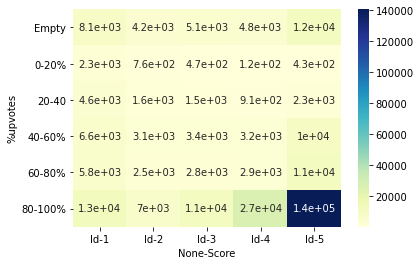

In [10]:
#Inference we see that the data is skewed towards Empty and more data is present in that column also 5% votes many aggree as we see a clear blue colour concentration
sns.heatmap(df_s.pivot(index='%upvotes',columns='Score'),annot=True,cmap='YlGnBu')#annot gives values 


In [11]:
from sklearn.metrics import accuracy_score,confusion_matrix

df['Score'].unique()
# We see 3 is neutral and others

df2=df[df['Score']!=3]
#df2.head()
#score values for score>3 set as 1 and lower as 0
#dependent variable as X which is Text and independent variable is y as Score
x=df2['Text']
#Mapping the dictationary with
y_dict={1:0,2:0,4:1,5:1}
#modifying Score column
y=df2['Score'].map(y_dict)
y

0         1
1         0
2         1
3         0
4         1
         ..
568449    1
568450    0
568451    1
568452    1
568453    1
Name: Score, Length: 525814, dtype: int64

In [12]:
#Y has the score values of 1 or 0 values
# NLP bag of words ie convert labelled data into 
from sklearn.feature_extraction.text import CountVectorizer
#count vectorizer object
c=CountVectorizer(stop_words='english')
# Y is df['Score'] and X is the transformed output of 
x_c=c.fit_transform(x)

print(x_c.shape)

(525814, 114969)


In [13]:
x_c.shape[1]

114969

In [14]:
#We need to convert the test into vectors for input to machine learning model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_c,y)
lr=LogisticRegression()
lr.fit(x_train,y_train)
score=lr.score(x_test,y_test)
print(score)# we get an  accuracy score of 0.9368


0.9357037442755641


C:\Users\DELL\.conda\envs\ameya\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
#fetch Top 20 Positive & Top 20 negative words
#make a data frame of this and get a good visual picture of the data
w=c.get_feature_names()
w

['00',
 '000',
 '0000',
 '000001',
 '00001',
 '000013',
 '0000soo',
 '0001',
 '000111052',
 '0002251337',
 '0003',
 '0004',
 '000iu',
 '000kwh',
 '000mg',
 '000mi',
 '000s',
 '000su',
 '000usd',
 '000v',
 '001',
 '00100',
 '00127',
 '00128',
 '00129',
 '00130',
 '00131',
 '00132',
 '00134',
 '00136',
 '00139',
 '001bru',
 '002',
 '0020100604',
 '00202',
 '00227',
 '0023',
 '003',
 '004',
 '00493',
 '005',
 '00533',
 '0060187654',
 '0060721855',
 '0060928115',
 '0060959584',
 '0061658197',
 '006176793x',
 '0067575986',
 '0069615',
 '007',
 '00703',
 '00704',
 '0071468633',
 '0071477845',
 '0071486011',
 '0071499849',
 '008',
 '0099',
 '00a',
 '00am',
 '00b',
 '00gr',
 '00lb',
 '00m',
 '00pm',
 '00s',
 '00something',
 '00z',
 '01',
 '010',
 '0100',
 '01014',
 '01069',
 '011',
 '012',
 '013',
 '01317',
 '01318',
 '014',
 '0140444254',
 '0140446680',
 '0143114964',
 '014mg',
 '015',
 '017',
 '0174',
 '018',
 '0188',
 '019',
 '01915',
 '0199232768',
 '0199535892',
 '0199536066',
 '02',
 '02

In [16]:
coef = lr.coef_.tolist()[0]
coef

[-0.31786208126645743,
 0.005800799539257717,
 0.3294745514481069,
 -0.0075773146593877735,
 -0.012037441561476054,
 -0.011384984065569509,
 0.0003162895728325037,
 -0.012595815690183093,
 0.0,
 0.0003534374813987234,
 0.0014993229877499944,
 -0.009909074626365453,
 0.0011587828427210348,
 0.01267370626355802,
 -0.32216522577127116,
 0.0,
 0.002523637087596479,
 0.003268951175610056,
 0.0005723553588331748,
 4.6394193158050295e-05,
 0.12224895454283609,
 0.0,
 0.036083353975278364,
 0.036083353975278364,
 0.036083353975278364,
 0.036083353975278364,
 0.036083353975278364,
 0.036083353975278364,
 0.036083353975278364,
 0.036083353975278364,
 0.036083353975278364,
 -0.0003351748728775072,
 0.07101777032697179,
 0.00013315804494809099,
 -0.10508772080604886,
 -0.0005474245127605473,
 0.0,
 0.004545817705996514,
 0.12971652189526042,
 0.0,
 -0.12890039637067738,
 0.011985109151595027,
 3.481595048109362e-05,
 0.005973041244944204,
 0.0,
 9.303720293282641e-05,
 0.006934984861939923,
 0.0,


In [17]:
df_coef=pd.DataFrame({'Word':w,'Coef':coef})
coeff_df = df_coef.sort_values(['Coef', 'Word'],ascending=False)
coeff_df.head(20)#20 high frequency postitive words 

,Word,Coef
80600,pleasantly,4.127388
39072,downside,3.110390
94667,skeptical,2.908382
5865,addicting,2.719191
87967,resist,2.384080
55029,hooked,2.250944
111520,welcome,2.234124
113138,worries,2.232090
35691,delighted,2.217829
39214,drawback,2.213870


In [18]:
coeff_df.tail(20)#20 high frequency negative words 

,Word,Coef
7321,allegro,-2.317414
62401,lacked,-2.341270
21288,blech,-2.357241
110404,vomited,-2.422085
56229,ick,-2.422107
23814,bummer,-2.432897
76576,overpowers,-2.442527
41118,embarrassed,-2.456551
35220,defeats,-2.483053
65064,lousy,-2.551221


In [19]:
#Creating a function to do the same job
y = df2['Score'].map(y_dict)
x=df2['Text']

In [20]:
def text_fit(x,y,nlp_model,ml_model,coef_show=1):
    x_c=nlp_model.fit_transform(x)
    x_train,x_test,y_train,y_test=train_test_split(x_c,y)
    ml=ml_model.fit(x_train,y_train)
    score=ml.score(x_test,y_test)
    print('Score: ',score)
    if coef_show==1:#Now we need to make a dataframe to display the top 20 positive and top 20 negative words
     w=nlp_model.get_feature_names()
     coef=ml.coef_.tolist()[0]
     #Creating a dataframe of w and coef
     df_222=pd.DataFrame({'Word':w,"coef":coef})
     df_222=df_222.sort_values(['coef', 'Word'], ascending=[0, 1]) 
     print('Top 20 positive values')
     print(df_222.head(20))
     print('/n')
     print('Top 20 negative values')
     print(df_222.tail(20))

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
c = CountVectorizer(stop_words = 'english')
from sklearn.linear_model import LogisticRegression
text_fit(x,y,c,LogisticRegression())

C:\Users\DELL\.conda\envs\ameya\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Score:  0.935764602066122
Top 20 positive values
                Word      coef
80600     pleasantly  4.036993
39072       downside  3.569131
5865       addicting  3.206009
113138       worries  2.902058
94667      skeptical  2.757758
35726         delish  2.643939
40342     economical  2.497880
87967         resist  2.470161
39214       drawback  2.455944
111911          whim  2.315599
87174       relaxing  2.239959
105162       trainer  2.206433
40135        easiest  2.202614
102067      tastiest  2.164005
78641          penny  2.128736
87233       relieved  2.110002
91064          saves  2.101555
82404   prescription  2.088582
55029         hooked  2.066628
38394         divine  2.061626
/n
Top 20 negative values
                  Word      coef
65064            lousy -2.500599
37563   disappointment -2.509037
106894     unappealing -2.509784
89868            ruins -2.529346
67898         mediocre -2.559238
23814           bummer -2.598171
56229              ick -2.644712
35220     

In [22]:
def predict_data(X, y, nlp_model,ml_model):
    
    X_c = nlp_model.fit_transform(X)
    print('features: {}'.format(X_c.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_c, y)
    print(' train records: {}'.format(X_train.shape[0]))
    print(' test records: {}'.format(X_test.shape[0]))
    ml =ml_model.fit(X_train, y_train)
    predictions=ml.predict(X_test)
    cm=confusion_matrix(predictions,y_test)
    print(cm)
    acc=accuracy_score(predictions,y_test)
    print(acc)

In [23]:
predict_data(x,y,c,LogisticRegression())


features: 114969
 train records: 394360
 test records: 131454


C:\Users\DELL\.conda\envs\ameya\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[ 15146   3021]
 [  5452 107835]]
0.9355439925753496


In [24]:
#TF-IDF a technique of NLP like CountVectorization here due to the drawback of the later like no weights to specific words we prefer the former.
#Nlp and Ml combinations like ml methods like dummy and nlp method of TfidfVectorizer

#DummyClassifier and TfidVectorizer
from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_obj=TfidfVectorizer(stop_words='english')
predict_data(x,y,tfidf_obj,DummyClassifier())



features: 114969
 train records: 394360
 test records: 131454
[[     0      0]
 [ 20396 111058]]
0.8448430629725988


In [25]:
text_fit(x,y,tfidf_obj,DummyClassifier(),0)

Score:  0.8432531531942733


In [26]:
#Nlp model of TFIDF and ML model of LogisticRegression
text_fit(x,y,tfidf_obj,LogisticRegression(),0)
#Accurany is roughly the same - 93.5%. However we notice that the significant words make much more sense now, with higher coefficient magnitude as well!

Score:  0.933984511692303


C:\Users\DELL\.conda\envs\ameya\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Data upvote % predictions

In [73]:
df = pd.read_csv('Reviews.csv')
print(df.shape)
#df.head()
df['Helpful %'] = np.where(df['HelpfulnessDenominator'] > 0, df['HelpfulnessNumerator'] / df['HelpfulnessDenominator'], -1)
pd.cut(df['Helpful %'] , bins = [-1, 0, 0.2, 0.4, 0.6, 0.8, 1.0], labels = ['Empty', '0-20%', '20-40%', '40-60%', '60-80%', '80-100%'])

(568454, 10)


0         80-100%
1             NaN
2         80-100%
3         80-100%
4             NaN
           ...   
568449        NaN
568450        NaN
568451    80-100%
568452    80-100%
568453        NaN
Name: Helpful %, Length: 568454, dtype: category
Categories (6, object): ['Empty' < '0-20%' < '20-40%' < '40-60%' < '60-80%' < '80-100%']

In [74]:
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
Helpful %                  0
dtype: int64

In [75]:
df['%upvotes'] = pd.cut( df['Helpful %'] , bins = [-1, 0, 0.2, 0.4, 0.6, 0.8, 1.0], labels = ['Empty', '0-20%', '20-40%', '40-60%', '60-80%', '80-100%'])
df.groupby(['Score', '%upvotes']).agg('count')
df.groupby(['Score', '%upvotes']).agg({'Id':'count'})
df.shape
#Upvote prediction fromheat map we observe that 5th score value is more dense and many people use this score
#So score of 5 is most relevant one hence we make data frame and x and y vaiables on this small reduced data frame


#This should be a dataframe of only score =5 values
data = df[df['Score'] == 5]
data.shape

(363122, 12)

In [76]:
data['%upvotes'].unique()#We want to predict %upvotes for Text  

['80-100%', NaN, '60-80%', 'Empty', '40-60%', '20-40%', '0-20%']
Categories (6, object): ['Empty' < '0-20%' < '20-40%' < '40-60%' < '60-80%' < '80-100%']

In [77]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'Helpful %', '%upvotes'],
      dtype='object')

In [85]:
data_2 = data[data['%upvotes'].isin(['0-20%', '20-40%', '60-80%', '80-100%'])]
data_2.shape

(154428, 12)

In [88]:
#map using a dictationary values for classification as 1 and some as 0
x=data_2['Text']
y_dict = {'0-20%': 0, '20-40%': 0, '60-80%': 1, '80-100%': 1}
y = data_2['%upvotes'].map(y_dict)

In [90]:
#After interpretation we see that the data is highly skewed  more values FOR 1 and less values for 0
print(y.value_counts())

1.0    151721
0.0      2707
Name: %upvotes, dtype: int64


In [93]:
#Having got x and y now plit fit and train the ml model to get the predictions
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_obj=TfidfVectorizer()
x_c=tfidf_obj.fit_transform(x)#x is text and sentence form hence use nlp to transform the data
x_train,x_test,y_train,y_test=train_test_split(x_c,y,train_size=0.7)


In [94]:
y_test.value_counts()


1.0    45541
0.0      788
Name: %upvotes, dtype: int64

In [95]:

from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler()
x_train,y_train=os.fit_resample(x_c,y)

In [97]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_train)))

Original dataset shape Counter({1.0: 151721, 0.0: 2707})
Resampled dataset shape Counter({1.0: 151721, 0.0: 151721})


In [ ]:

'''
See when u do model.score(x_test, y_test)
it means u are going to check how well your test data is fitted with your ML algo

but if u use accuracy score.. it means what % of the total values are predicted right !
Suppose accuracy score is 0.89
it means 89% values are predicted right !

'''

In [98]:
from sklearn.model_selection import GridSearchCV
lr=LogisticRegression()

params={'C':10.0**np.arange(-2,3),'penalty':['l1','l2']}

clf=GridSearchCV(estimator=lr,param_grid=params,cv=5,n_jobs=-1,scoring='f1_macro')


In [101]:
#clf.fit(x_train,y_train)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

C:\Users\DELL\.conda\envs\ameya\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.78276791        nan 0.88049184        nan 0.95480004
        nan 0.97777143        nan 0.98393345]
  warnings.warn(


[[  788     0]
 [  580 44961]]
0.987480843532129


C:\Users\DELL\.conda\envs\ameya\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
